# Udacity Data Wrangling Project

**Project Author:** Mr. Burak Gunbatan  
**Project Date:** 28 November 2018  

## Import Libraries and Data

In [54]:
import pandas as pd # Handling Dataframes
import numpy as np # Mathematical Python
import requests # Downloading Files Programatically
import json # Handling JSON files
import os # Handling directories 
from tqdm import * # Progress tracker
import sqlalchemy # Exporting to Database
import matplotlib.pyplot as plt
import re

### Data Steps

### Import Manually Downloaded Data

In [55]:
# Importing manually downloaded data
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Import Programmatically Downloaded Data

In [56]:
# Import programmatically downloaded data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save data
with open('image-predictions.tsv', "wb") as file: file.write(response.content)
    
# Import data
df_breeds = pd.read_csv('image-predictions.tsv', sep="\t")
df_breeds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Import Data from Twitter API

I had a trouble about accessing to project data with twitter account so that reason, 'Accessing data without twitter account' steps were used below.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [57]:
# Read text file line by line to create dataframe
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


In [58]:
df_api.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [59]:
# Reduce df_api to the necessary columns
df_response = df_api[['id', 'retweet_count', 'favorite_count']]

df_response.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [60]:
# Save dataframe for visual assessment
df_response.to_csv("tweet_json.csv")

# Copy Dataframes for Cleaning
df_clean = df.copy()
df_breeds_clean = df_breeds.copy()
df_response_clean = df_response.copy()

## Data Assessment  

### **Visual Assessment**   
Visual assessment was carried out by opening csv files.  

Quality Issues:  
Some tweets within df_breeds do not contain dogs. In order to define which rows to remove, a sample of pictures needed to be assesed visually. However, a programmatic approach was used in order to find populations.  
Columns in df_clean contain non-useful information such as "source", "expanded_urls".  
Dog names and stages in df_clean file also do not always map properly to their respective columns.

Tidiness Issues:  
df contains information about various tweets which is similar in theme to the data.

### Programatic Assessment

### df assessment

In [61]:
# Check data types of each dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are missing values in this dataframe.  
('in_reply_to_status_id', 'in_reply_to_user_id, 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded urls')  

Quality Issues:  
A number of posts are retweets or they seems like responded to other comments.  
'tweet_id' is a categorical value but is labeled as an integer (ordinal value).  
'rating_numerators' and 'rating_demominators' are not always map correctly to the score.  
If all "None" values are removed, there are very few categorisations will be left over. Around 80/2356 of categorisations can be made.

Tidiness Issues:  
doggo, floofer, pupper and puppo columns should be collapsed into one column named dog_type.

### df_breeds assessment

In [62]:
df_breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are no missing entries in this dataframe.  
Most columns has an appropriate datatype.  
Although the CNN does not recognise the dog within the picture right away, it sometimes recognises it as the 2nd or 3rd highest probability.  

Explanations:  
tweet_id: id of tweet  
jpg_url: web address of dog image  
img_num: a column of ones  
p1, p2, p3: Prediction of breed in descending order of probability  
p1_conf, p2_conf, p3,conf: Probability of prediction in descending order of probability  
p1_dog, p2_dog, p3_dog: Whether or not p1 $\rightarrow$ p3 is a breed of dog  


Quality Issues:  
"img_num" is providing no new information.  
p1_dog $\rightarrow$ p3_dog indicate pictures where no dog is present or one is present but wasn't recognised
tweet_id is a categorical value but is labeled as an integer (ordinal value).

In [63]:
## Which one is not a dog - Check
df_breeds[(df_breeds["p1_dog"] == False) &
         (df_breeds["p2_dog"] == False) &
         (df_breeds["p3_dog"] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


It seems that the CNN is relatively good at detecting what is not a dog.

In [64]:
# Check how accurate the CNN is when the first selection is a dog
df_breeds[(df_breeds["p1_dog"] == True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


In [65]:
# Checking selection when the 2nd or 3rd probabilities are dogs
df_breeds[((df_breeds["p1_dog"] == False) &
         ((df_breeds["p2_dog"] == True) |
         (df_breeds["p3_dog"] == True)))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False


When the top probability is not a dog then it seems that there is usually a dog present in the picture then the first match had a probability score of less than 0.5
If the picture is recognised to have a dog with more than a 0.25 rating, then there is a decent probability that it has a dog.

> I will select this criteria to be sure and have a categorisation which is a high probability of being a dog in the picture. 


### df_response assessment

In [66]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


There is no missing data from datafame.  

Explanations:  
'id' is "tweet_id" in other dataframes.  
'retweet_count' number of times tweet has been retweeted.  
'favorite_count' number of times tweet has bene favorited.  

Quality Issues:  
id is a numerical value, it should be a string.  
tweet_id is incorrectly labeled as 'id'.  

# Data Cleaning

## Summary of Assessments

Quality Cases:  

1. Some tweets within df_breeds do not contain dogs. In order to define which rows to remove, a sample of pictures needed to be assesed visually. However, a programmatic approach was used in order to find populations.  
2. Columns in df_clean contain non-useful information such as "source", "expanded_urls".  
3. Dog names and stages in df_clean file also do not always map properly to their respective columns.  
4. A number of posts are retweets or they seems like responded to other comments.  
5. 'tweet_id' is a categorical value but is labeled as an integer (ordinal value).  
6. 'rating_numerators' and 'rating_demominators' are not always map correctly to the score.  
7. If all "None" values are removed, there are very few categorisations will be left over. Around 80/2356 of categorisations can be made.  
8. "img_num" is providing no new information.  
9. p1_dog $\rightarrow$ p3_dog indicate pictures where no dog is present or one is present but wasn't recognised tweet_id is a categorical value but is labeled as an integer (ordinal value).  
10. id is a numerical value, it should be a string.  
11. tweet_id is incorrectly labeled as 'id'.  

Tidiness:  
1. Info from df_response_clean and df_clean both contain information about tweets.  
2. "doggo", "floofer", "pupper" and "puppo" columns in df_clean that have a common "theme" of being the stage of the dog within the tweet, and contain very little information what would be difficult to fill out.  
  

## Cleaning Steps

1. Remove rows that are retweets or responses and delete their respective columns  
2. Remove useless columns from df_clean (including dog stage)  
3. Remove column "img_num" from df_breeds 
4. Remove rows in df_breeds where:  
  All probabilities of p_dog are False  
  The Probabilities of p2_dog and p2_dog are lower than 0.2  
5. Rename "id" to "tweet_id" in df_response 
6. Convert "tweet_id" in df and df_breeds as well as "id" in df_response from integers to strings  
7. Make sure that IDs are consistent across dataframes by removing rows whose ID does not appear in the other two dataframes:  
  Removed ids from df_breeds should be removed from other dataframes  
  Failed ids that didn't make it into df_recieved should also be removed from other dataframes  
8. Use regular expressions to find the numerator and denominator of the score and place save them in the correct column ("numerator", "denominator")  
9. Check dog names in df_clean using regular expressions, do not double check the dog  
10. Since p1_dog is always true and has the highest probability of being the correct prediction, I will remove p1_dog and p1_conf, change p1 to "predictedbreed" and change the "" within the strings to " " and make all characters lowercase.  

N.B. These steps are not in the same order as they appeared in the summary assessment.  

In [67]:
### Remove rows that are retweets or responses and delete their respective columns

# Convert from integer to string
df_clean["in_reply_to_status_id"] = df_clean["in_reply_to_status_id"].astype(str)
df_clean["retweeted_status_id"] = df_clean["retweeted_status_id"].astype(str)

# Find ids to remove
replies = df_clean[df_clean["in_reply_to_status_id"]!="nan"]["tweet_id"].index
df_clean.drop(replies, inplace=True)

retweets = df_clean[df_clean["retweeted_status_id"]!="nan"]["tweet_id"].index
df_clean.drop(retweets, inplace=True)

# Replace weird "nan" strings with actual NaNs
df_clean["in_reply_to_status_id"].replace("nan", np.nan, inplace=True)
df_clean["retweeted_status_id"].replace("nan", np.nan, inplace=True)

In [68]:
### Remove useless columns from df_clean

remove_cols_info = ["source", "expanded_urls", "doggo", "floofer", "pupper", "puppo",
                   "in_reply_to_status_id", "in_reply_to_user_id", 
                   "retweeted_status_id", "retweeted_status_user_id", 
                    "retweeted_status_timestamp"]
df_clean.drop(columns=remove_cols_info, inplace=True)

In [69]:
### Remove column "img_num" from df_breeds_clean

df_breeds_clean.drop(columns=("img_num"), inplace=True)

In [70]:
### Remove rows in df_breeds_clean
    
# Find indexes of pictures not of dogs
not_dog = df_breeds_clean[(df_breeds_clean["p1_dog"] == False) &
         (df_breeds_clean["p2_dog"] == False) &
         (df_breeds_clean["p3_dog"] == False)]["tweet_id"].index

# Find indexes of pictures that are unlikely to be dogs
unlikely_dog = df_breeds_clean[(df_breeds_clean["p1_dog"] == False) &
         (df_breeds_clean["p2_conf"] < 0.2) &
         (df_breeds_clean["p3_conf"] < 0.2)]["tweet_id"].index

# Put both series into the same variable
remove_row = not_dog.append(unlikely_dog)

df_breeds_clean.drop(remove_row, inplace=True)

In [71]:
### Rename "id" to "tweet_id" in df_response_clean

df_response_clean.rename({"id": "tweet_id"}, axis=1, inplace=True)

In [72]:
### Convert "tweet_id" in df_clean and df_breeds_clean as well as "id" in  df_response_clean from integers to strings

df_clean["tweet_id"] = df_clean["tweet_id"].astype("str")
df_breeds_clean["tweet_id"] = df_breeds_clean["tweet_id"].astype("str")
df_response_clean["tweet_id"] = df_response_clean["tweet_id"].astype("str")


In [73]:
### Make sure that IDs are consistent across dataframes by removing rows whose ID does not  appear in the other two dataframes

# Merge info with response (name info)
df_temp = df_clean.merge(df_response_clean, how="inner", on="tweet_id").copy()

# Remove Duplicates
df_temp.drop_duplicates(inplace=True)

# Merge breeds with info
df_clean = df_temp.merge(df_breeds_clean, how="inner", on="tweet_id").copy()

# Turns out that the same text can have multiple tweet_ids
# Drop duplicates according to "text" column. 
df_clean.drop_duplicates(subset='text', keep="first", inplace=True)

In [74]:
# View all occurences where there are more than one #/# in 'text' column

df_clean[df_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

/Users/burakgunbatan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
456,777684233540206592,2016-09-19 01:42:24 +0000,"""Yep... just as I suspected. You're not flossi...",12,10,None,3403,12518,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
606,747600769478692864,2016-06-28 01:21:27 +0000,This is Bookstore and Seaweed. Bookstore is ti...,10,10,Bookstore,619,2545,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
642,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",9,11,None,9220,20648,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
712,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,1764,4493,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
741,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,247,2574,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
754,714258258790387713,2016-03-28 01:10:13 +0000,Meet Travis and Flurp. Travis is pretty chill ...,10,10,Travis,808,3281,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
847,703356393781329922,2016-02-26 23:10:06 +0000,This is Socks. That water pup w the super legs...,9,10,Socks,429,2085,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
921,694352839993344000,2016-02-02 02:53:12 +0000,Meet Oliviér. He takes killer selfies. Has a d...,10,10,Oliviér,700,2244,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
948,691483041324204033,2016-01-25 04:49:38 +0000,When bae says they can't go out but you see th...,5,10,None,656,2608,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True
958,690400367696297985,2016-01-22 05:07:29 +0000,This is Eriq. His friend just reminded him of ...,10,10,Eriq,509,2041,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,Pembroke,0.426459,True,papillon,0.317368,True,Shetland_sheepdog,0.077616,True


In [75]:
# Save the text where the rating numerator and denominators were incorrectly extracted

ratings_to_fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'] 

In [76]:
# Loop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. As all the
# occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.

for entry in ratings_to_fix:
    mask = df_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_clean.loc[mask, column_name2] = 10

In [77]:
##test
df_clean[df_clean.text.isin(ratings_to_fix)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
642,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",14,10,None,9220,20648,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
712,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,13,10,None,1764,4493,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
741,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,11,10,Bluebert,247,2574,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1476,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,9,10,an,71,152,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [78]:
# View tweets with decimals in rating in 'text' column

df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Users/burakgunbatan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
35,883482846933004288,2017-07-08 00:28:19 +0000,This is Bella. She hopes her smile made you sm...,5,10,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
414,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
454,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1080,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,26,10,None,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [79]:
# Change datatype of rating_numerator and denominator to float

df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('float')
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('float')

In [80]:
# Set correct numerators for specific tweets

df_clean.loc[(df_clean['tweet_id'] == 883482846933004288) & (df_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_clean.loc[(df_clean['tweet_id'] == 786709082849828864) & (df_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_clean.loc[(df_clean['tweet_id'] == 778027034220126208) & (df_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_clean.loc[(df_clean['tweet_id'] == 680494726643068929) & (df_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [81]:
# Clean tweets without rating

df_clean = df_clean[df_clean.tweet_id != 810984652412424192]

In [82]:
### Since p1_dog is always true and has the highest probability of being the correct prediction, I will remove p1_dog and p1_conf, change p1 to "predictedbreed" and change the "" within the strings to " " and make all characters lowercase.

# Remove all "pN_dog" and "pN_conf" columns
df_clean.drop(columns=["p1_dog", "p1_conf", 
                       "p2_dog", "p2_conf", 
                       "p3_dog", "p3_conf", 
                       "p2", "p3"], inplace=True)

# Change p1 to "predicted_breed"
df_clean.rename(columns={"p1": "predicted_breed"}, inplace=True)

# Change all alphabetical characters in "predicted_breed" to lower-case
# change all "_" to " " within strings
df_clean["predicted_breed"] = df_clean["predicted_breed"].apply(lambda x: 
                                                                x.lower().replace("_", " "))

In [83]:
### Check dog names in df_clean using regular expressions, do not double check the dog 

# Find string that contain format "This is <name>." and remove rows that do not have it.
df_clean_name_format = df_clean["text"].str.contains("This is ([A-Z][a-z]+).")

# Extract names and add to proper column
df_clean = df_clean[df_clean_name_format].copy()

# Extract names
df_clean["name"] = df_clean.text.str.extract("This is ([A-Z][a-z]+).", expand=False)

/Users/burakgunbatan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


## Testing

In [84]:
## Remove rows that are retweets or responses and delete their respective columns

try: 
    df_clean[unlikely_dog]
except KeyError: print("Columns are successfully deleted")

Columns are successfully deleted


In [85]:
### Remove useless columns from df_info_clean

try: 
    df_clean[remove_cols_info]
except KeyError: print("Columns are successfully deleted")

Columns are successfully deleted


In [86]:
### Remove column "img_num" from df_breeds_clean

try: 
    df_breeds_clean["img_num"]
except KeyError: print("Columns are successfully deleted")

Columns are successfully deleted


In [87]:
### Remove rows in df_breeds_clean

# Check certain not dogs
assert len(df_breeds_clean[(df_breeds_clean["p1_dog"] == False) &
     (df_breeds_clean["p2_dog"] == False) &
     (df_breeds_clean["p3_dog"] == False)]) == 0
print("Certain not dogs are successfully deleted")

# Check probably not dogs
assert len(df_breeds_clean[(df_breeds_clean["p1_dog"] == False) &
                    (df_breeds_clean["p2_conf"] < 0.2) &
                    (df_breeds_clean["p3_conf"] < 0.2)]) == 0
print("Probable not dogs are successfully deleted")

Certain not dogs are successfully deleted
Probable not dogs are successfully deleted


In [88]:
### Rename "id" to "tweet_id" in df_response_clean

if df_response_clean.columns[0] == "tweet_id": print("Columns are successfully renamed")

Columns are successfully renamed


In [89]:
### Convert "tweet_id" in df_clean and df_breeds_clean as well as "id" in  df_response_clean from integers to strings

if df_clean["tweet_id"].dtype == 'O': 
    print("df_clean dtype change is successful")
if df_breeds_clean["tweet_id"].dtype == 'O': 
    print("df_breeds_clean dtype change is successful")
if df_response_clean["tweet_id"].dtype == 'O': 
    print("df_response_clean dtype change is successful")

df_clean dtype change is successful
df_breeds_clean dtype change is successful
df_response_clean dtype change is successful


In [90]:
### Make sure that IDs are consistent across dataframes by removing rows whose ID does not  appear in the other two dataframes:

#Removed ids from df_breeds should be removed from other dataframes
#Failed ids that didnt make it into df_recieved should also be removed from other dataframes
#Do this by merging files, keeping track of IDs was too cumbersome

if not df_clean.duplicated().sum(): print("Merge is successful")

Merge is successful


In [91]:
### Check dog names in df_clean using regular expressions, do not double check the dog type since it is not contained within the text and there is no programmatic way to assess this.

df_clean.name

0              Tilly
1             Archie
2           Franklin
6               Zoey
7             Cassie
8               Koda
9              Bruno
11               Ted
12            Stuart
13            Oliver
14               Jim
15              Zeke
16           Ralphus
17            Gerald
18           Jeffrey
19            Canela
22              Maya
23            Mingus
24            Roscoe
25           Waffles
26             Jimbo
27            Maisey
29              Earl
30              Lola
31             Kevin
34              Noah
35             Bella
38             Rusty
39               Gus
40           Stanley
            ...     
1407        Skittles
1409           Alfie
1410          Jiminy
1411    Cleopatricia
1412            Erik
1421            Kial
1423           Frank
1425            Dook
1428        Philippe
1431           Reese
1434           Biden
1435            Fwed
1436       Genevieve
1437          Joshwa
1439         Timison
1442        Clarence
1444         

In [92]:
### Since p1_dog is always true and has the highest probability of being the correct prediction, I will remove p1_dog and p1_conf, change p1 to "predicted_breed" and change the "_" within the strings to " " and make all characters lowercase.

df_clean["predicted_breed"]

0                      chihuahua
1                      chihuahua
2                         basset
6                  irish terrier
7                       pembroke
8                        samoyed
9                 french bulldog
11                french bulldog
12              golden retriever
13                       whippet
14              golden retriever
15              golden retriever
16                siberian husky
17                french bulldog
18                        basset
19                      pembroke
22                     chihuahua
23                        kuvasz
24                french bulldog
25                           pug
26              blenheim spaniel
27                           pug
29             italian greyhound
30                          chow
31                           pug
34                      doberman
35              golden retriever
38                    eskimo dog
39            labrador retriever
40                      pembroke
          

## Export Data

In [94]:
# Write to CSV file
df_clean.to_csv('WeAreDogs.csv')

In [95]:
# Create engine
engine = sqlalchemy.create_engine('sqlite:///WeAreDogs.db')

# Create database
df_clean.to_sql('master', engine, index=False)

## Analyze

In [96]:
# Create copy of df_clean to work off of using only my variables of interest
time_df = df_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [97]:
# Set the index to be the timestamp so time is displayed properly in plots
time_df.set_index('timestamp', inplace=True)

In [98]:
# Create rating_ration variable by dividing the rating numerator by the deonominator to normalize scores which are not 
# out of 10
time_df['rating_ratio'] = time_df['rating_numerator']/time_df['rating_denominator']

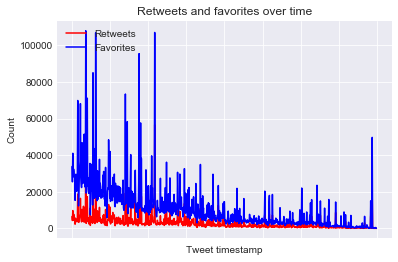

In [99]:
time_df['retweet_count'].plot(color = 'red', label='Retweets')
time_df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

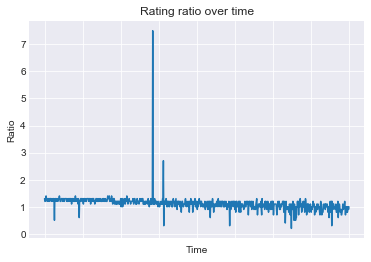

In [100]:
time_df['rating_ratio'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()

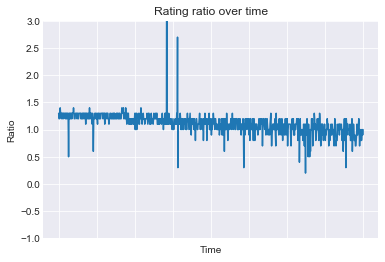

In [101]:
# Limit y axis to zoom in on data and ignore outliers
time_df['rating_ratio'].plot()
plt.ylim(-1, 3)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio_zoom.png')
plt.show()